# Advanced Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras_hub as hub
import keras

import tensorflow as tf
from datasets import Dataset
#import tensorflow_decision_forests as tfdf
#import ydf
from sklearn.model_selection import train_test_split

Embeddings

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Data Set Up

In [3]:
df = pd.read_csv('../data/clean/job_ads.csv')

In [4]:
df.columns

Index(['title', 'department', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'job_ad',
       'country'],
      dtype='object')

In [5]:
X = df['job_ad']
y = df['fraudulent']

In [6]:
X = X.fillna('')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2, random_state= 16312)

## Model Set Up

Documentation from Keras on using the [DistilBERT models](https://keras.io/keras_hub/api/models/distil_bert/distil_bert_text_classifier/)

In [8]:
#tokenizer = keras_hub.tokenizers.Tokenizer.from_preset(
#    'distil_bert_base_en_uncased'
#)
#backbone = keras_hub.models.Backbone.from_preset(
#    'destil_bert_base_en_uncased'
#)
preprocessor = hub.models.DistilBertTextClassifierPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    #sequence_length=15_000,
)

classifier = hub.models.DistilBertTextClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    preprocessor = preprocessor
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='keras_model1/epoch{epoch:02d}.keras',
    monitor = 'val_accuracy',
    mode='max'
)

model_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    baseline= 0.01,
    start_from_epoch=5
)

In [9]:
hisotry0 = classifier.fit(
    x= X_train, 
    y= y_train, 
    batch_size=128,
    callbacks = [model_checkpoint, model_earlystopping],
    validation_data = (X_test, y_test),
)

112/112 ━━━━━━━━━━━━━━━━━━━━ 12508s 112s/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9737


In [19]:
hisotry0.history['sparse_categorical_accuracy']

[0.9521812200546265]

In [20]:
hisotry0.history['val_sparse_categorical_accuracy']

[0.9737136363983154]

In [21]:
hisotry0.history['loss']

[0.1696959286928177]

In [22]:
hisotry0.history['val_loss']

[0.09252356737852097]

In [25]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes = 2)

In [30]:
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes = 2)

In [26]:
y_train_one_hot.shape

(14304, 2)

In [23]:
classifier.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 2e-5),
    loss= keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()],
)

classifier.backbone.trainable = False

In [28]:
model_checkpoint_1 = keras.callbacks.ModelCheckpoint(
    filepath='keras_model1/epoch{epoch:02d}.keras',
    monitor = 'val_accuracy',
    mode='max'
)

model_earlystopping_1 = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    baseline= 0.01,
    start_from_epoch=5
)

In [31]:
history1 = classifier.fit(
    x= X_train, 
    y= y_train_one_hot, 
    batch_size=128,
    epochs=20,
    callbacks = [model_checkpoint, model_earlystopping],
    validation_data = (X_test, y_test_one_hot),
)

Epoch 1/20


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [67]:
X.shape

(17880,)

In [68]:
y.shape

(17880,)

In [ ]:
# Example training:
# classifier.fit(
#     x=your_text_data,
#     y=your_labels,
#     epochs=some_epochs,
#     batch_size=some_batch_size
# )

In [ ]:
# predictions = classifier.predict(new_text_data)

In [ ]:
text_classifier = pipeline('text-classification', model='distilbert/distilbert-base-uncased')

We're going to fine-tune the [DistilBERT model](https://huggingface.co/distilbert/distilbert-base-uncased) to classify these fraudulent job ads.

In [9]:
history1 = classifier.fit(
    x=X_train,
    y=y_train,
    epochs = 20,
    callbacks = [model_checkpoint, model_earlystopping],
    validation_data = (X_test, y_test)
)

Epoch 1/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 6862s 15s/step - loss: 0.1905 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0754 - val_sparse_categorical_accuracy: 0.9768
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7035s 16s/step - loss: 0.0556 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9821
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7346s 16s/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0765 - val_sparse_categorical_accuracy: 0.9829
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7241s 16s/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9810
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7253s 16s/step - loss: 0.0104 - sparse_categorical_accuracy: 0.9965 - val_loss: 0.0754 - val_sparse_categorical_accuracy: 0.9855
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7244s 16s/step - loss: 0.0052 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0909 - val_sparse_categorical_acc

In [10]:
history1.history['val_loss']

[0.07536141574382782,
 0.06328988820314407,
 0.07653730362653732,
 0.1079559177160263,
 0.07540149986743927,
 0.09094066172838211,
 0.0799139142036438,
 0.09469270706176758,
 0.09518659859895706,
 0.0962059274315834]

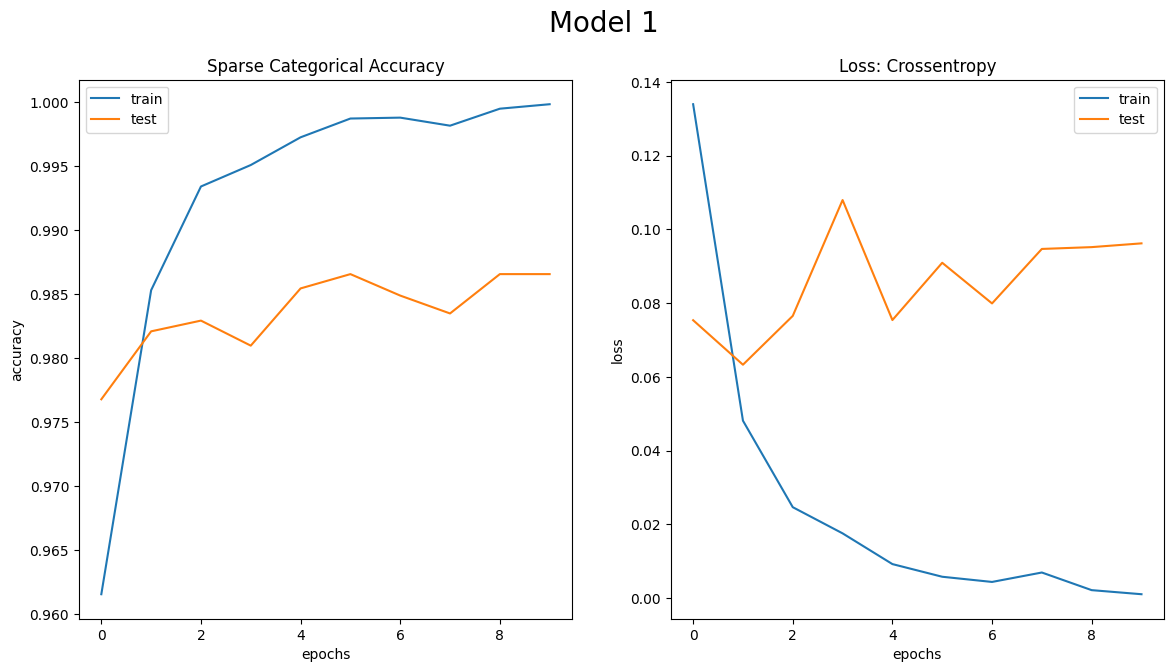

In [15]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

fig.suptitle('Model 1', fontsize = 20)
ax=axes[0]
ax.plot(history1.history['sparse_categorical_accuracy'], label= 'train')
ax.plot(history1.history['val_sparse_categorical_accuracy'], label= 'test')

ax.set_title('Sparse Categorical Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

ax=axes[1]
ax.plot(history1.history['loss'], label= 'train')
ax.plot(history1.history['val_loss'], label= 'test')

ax.set_title('Loss: Crossentropy')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend();

plt.savefig('../images/distilbert.jpg')

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

fig.suptitle('Model 1', fontsize = 20)
ax=axes[0]
ax.plot(history1.history['sparse_categorical_accuracy'], label= 'train')
ax.plot(history1.history['val_sparse_categorical_accuracy'], label= 'test')

ax.set_title('Sparse Categorical Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_ylim(0,1)
ax.legend()

ax=axes[1]
ax.plot(history1.history['loss'], label= 'train')
ax.plot(history1.history['val_loss'], label= 'test')

ax.set_title('Loss: Crossentropy')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_ylim(0,1)
ax.legend();

plt.savefig('../images/distilbert_full.jpg')

In [18]:
preds1 = classifier.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 589s 5s/step


In [23]:
classification_report(y_test, preds1, target_names = ['legit', 'fraud'], digits=4)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [31]:
preds1[:20]

array([[ 5.3072286, -5.0601315],
       [ 5.3076897, -5.0660696],
       [ 5.220608 , -4.942237 ],
       [ 5.306829 , -5.0634975],
       [ 5.3131437, -5.0661216],
       [-2.5349896,  2.4398482],
       [ 5.2380886, -4.9584503],
       [ 5.3138976, -5.0771074],
       [ 5.3058634, -5.06546  ],
       [ 5.3191004, -5.0726967],
       [ 5.2620296, -4.9881706],
       [ 5.311273 , -5.0689745],
       [ 5.2989054, -5.0428624],
       [ 5.3002625, -5.0584297],
       [ 5.307322 , -5.065933 ],
       [ 5.288185 , -5.0285435],
       [ 5.2986355, -5.054661 ],
       [ 5.3118534, -5.0699053],
       [ 5.292017 , -5.0382543],
       [ 5.2902894, -5.031836 ]], dtype=float32)

In [25]:
y_test

6246     0
7291     0
4206     0
15046    0
7043     0
        ..
9040     0
332      0
9982     0
15975    0
3914     0
Name: fraudulent, Length: 3576, dtype: int64

In [27]:
1-y_test

6246     1
7291     1
4206     1
15046    1
7043     1
        ..
9040     1
332      1
9982     1
15975    1
3914     1
Name: fraudulent, Length: 3576, dtype: int64

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

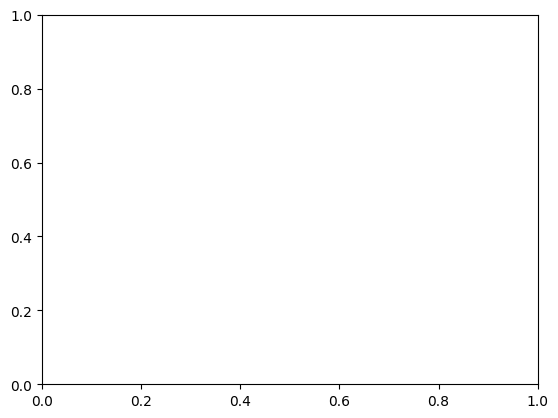

In [24]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(y_test, preds1, display_labels=['legit', 'fraud'], ax=ax);
ax.set_title('Confusion Matrix')

fig.savefig('../images/cm_distilbert.png')